In [ ]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#import google drive package
from  google.colab import drive

In [ ]:
from fastai.vision import *

In [ ]:
# connect workbook to google drive folder to access images 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#save path to project folder 
root_path = 'drive/My Drive/Ball_Image_Classifier/'

In [ ]:
#save path for balls folder that contains images and variable tags 
proj_path = 'drive/My Drive/Ball_Image_Classifier/Balls/'

In [ ]:
#make folder names 
folders = ['golf','baseball','basketball','soccer','tennis','bowling','lacrosse','american_football','rugby','cricket','volleyball','pool','hockey','softball']

In [ ]:
#save fastai path 
p_path = Path(proj_path)

In [ ]:
# create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['american_football',
 'baseball',
 'basketball',
 'bowling',
 'cricket',
 'golf',
 'hockey',
 'pool',
 'rugby',
 'soccer',
 'softball',
 'tennis',
 'volleyball']

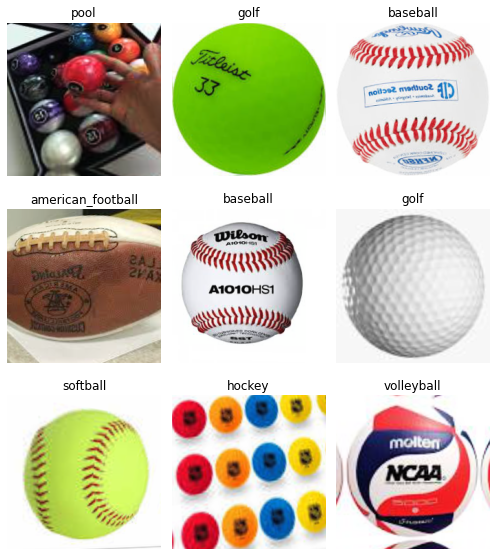

In [ ]:
data.show_batch(rows = 3,figsize = (7,8))

In [ ]:
data.classes, data.c, len(data.train_ds),len(data.valid_ds)

(['american_football',
  'baseball',
  'basketball',
  'bowling',
  'cricket',
  'golf',
  'hockey',
  'pool',
  'rugby',
  'soccer',
  'softball',
  'tennis',
  'volleyball'],
 13,
 1144,
 285)

In [ ]:
#build the CVV learner
learn = cnn_learner(data, models.resnet34,metrics = error_rate)

In [ ]:
#train 8 epochs of the model
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.268551,1.122748,0.298246,00:11
1,1.963883,0.517913,0.147368,00:11
2,1.314307,0.470762,0.133333,00:11
3,0.935035,0.414350,0.112281,00:11
4,0.701381,0.407603,0.101754,00:10
5,0.552136,0.399355,0.101754,00:10
6,0.435684,0.396984,0.105263,00:10
7,0.349711,0.401387,0.105263,00:10


In [ ]:
#save model
learn.save('model1_34',return_path = True)

PosixPath('drive/My Drive/Ball_Image_Classifier/Balls/models/model1_34.pth')

In [ ]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


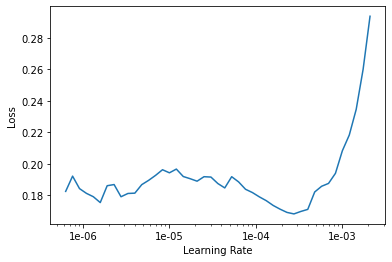

In [ ]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [ ]:
# fit whole model with new learning rate 
learn.fit_one_cycle(2, max_lr= slice(1e-6,1e-05),wd = .001)

epoch,train_loss,valid_loss,error_rate,time
0,0.178822,0.399810,0.105263,00:11
1,0.172473,0.393373,0.105263,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


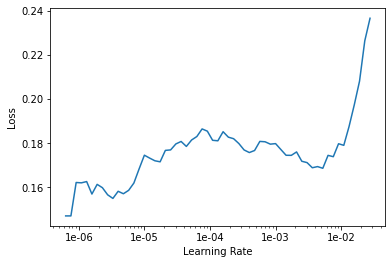

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save('model2_34')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

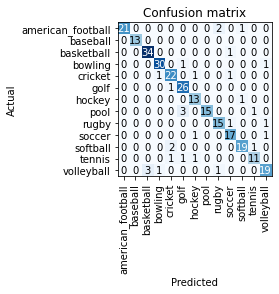

In [ ]:
interp.plot_confusion_matrix()

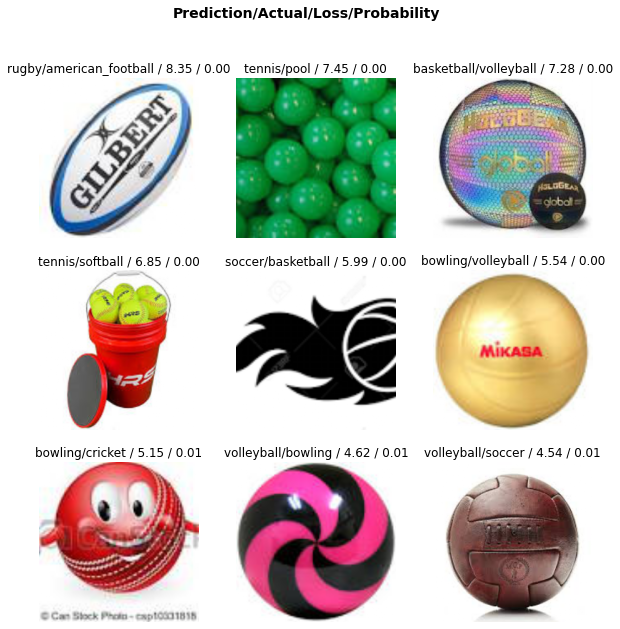

In [ ]:
interp.plot_top_losses(9,figsize=(10,10))

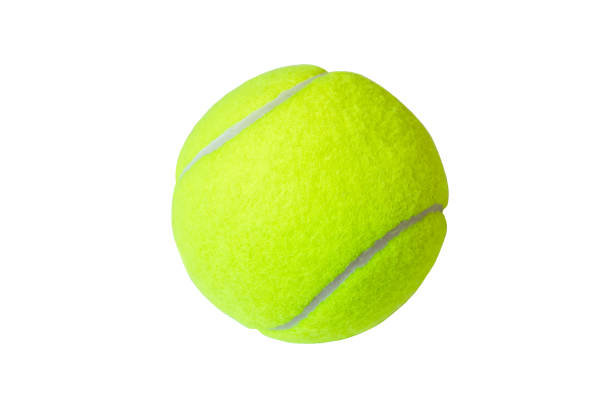

In [ ]:
#img_baseball= open_image(Path(root_path)/'Balls_valid'/'baseball_valid.jpeg')
#img_baseball
img_tennis= open_image(Path(root_path)/'Balls_valid'/'tennis_valid.jpg')
img_tennis


In [ ]:
#pred_class,pred_idx,outputs = learn.predict(img_baseball)
#print(pred_class)
pred_class,pred_idx,outputs = learn.predict(img_tennis)
print(pred_class)

tennis


In [ ]:
learn.data.classes

['american_football',
 'baseball',
 'basketball',
 'bowling',
 'cricket',
 'golf',
 'hockey',
 'pool',
 'rugby',
 'soccer',
 'softball',
 'tennis',
 'volleyball']